# Table of Contents
* [Assignment 3: Neural Network Regression with tanh and relu](#Assignment-3:-Neural-Network-Regression-with-tanh-and-relu)
	* [Overview](#Overview)
	* [Neural Network Code](#Neural-Network-Code)
	* [Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations](#Neural-Network-Performance-with-Different-Hidden-Layer-Structures-and-Numbers-of-Training-Iterations)
		* [Example with Toy Data](#Example-with-Toy-Data)
		* [Experiments with Automobile Data](#Experiments-with-Automobile-Data)
	* [Experiments with relu activation function](#Experiments-with-relu-activation-function)
	* [Text descriptions](#Text-descriptions)
	* [Grading and Check-in](#Grading-and-Check-in)
	* [Extra Credit](#Extra-Credit)


$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 3: Neural Network Regression with tanh and relu

Daniel Kielman dwkielman@gmail.com

## Overview

The goal of this assignment is to 
   * gain some experience in comparing different sized neural networks when applied to a data set, 
   * implement a different activation function, relu, and compare with Tanh, and
   * learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create a new version of that class, apply it to a data set, and discuss the results. You will then create a second version, named ```NeuralNetwork_relu```, that uses the relu activation function instead of the tanh function.

## Neural Network Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetworks as nn
import pandas as pd

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

In [2]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [3]:
def run_parameters(Xtrain, Ttrain, Xtest, Ttest, epochs_list, nh_list, verbose=False):

    n_inputs = Xtrain.shape[1]  # number of columns in X
    n_outputs = Ttrain.shape[1]  # number of columns in T
    
    results = pd.DataFrame(columns=['Epochs', 'Hidden Units', 'RMSE Train', 'RMSE Test'])
    for n_epochs in epochs_list:        
        for nh in nh_list:
            nnet = nn.NeuralNetwork(Xtrain.shape[1], nh, n_outputs)
            nnet.train(Xtrain, Ttrain, n_epochs)
            Ytrain = nnet.use(Xtrain)
            Ytest = nnet.use(Xtest)
            results.loc[len(results)] = [n_epochs, nh, rmse(Ytrain, Ttrain), 
                                         rmse(Ytest, Ttest)]
            if verbose:
                display(results.tail(1))  # not print
    return results

In [4]:
hiddens = [[0]] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
hiddens

[[0],
 [1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [5],
 [5, 5],
 [5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5, 5],
 [10],
 [10, 10],
 [10, 10, 10],
 [10, 10, 10, 10],
 [10, 10, 10, 10, 10],
 [20],
 [20, 20],
 [20, 20, 20],
 [20, 20, 20, 20],
 [20, 20, 20, 20, 20],
 [50],
 [50, 50],
 [50, 50, 50],
 [50, 50, 50, 50],
 [50, 50, 50, 50, 50]]

### Experiments with Automobile Data

Using the automobile mpg data we have used before, we will set it up to use 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

## Experiments with relu activation function

Now define the ```NeuralNetwork_relu``` class by extending ```NeuralNetwork``` and simply redefine the ```activation``` and ```activation_derivative``` methods.  Feel free to search the net for examples of how to define these functions.  Try keywords like *relu derivative python*.  Acknowledge the sites that you find helpful.

Your `NeuralNetwork_relu` class must be defined in your `neuralnetworks.py` file.

Write and run the code that repeats the above experiments with the auto-mpg data using `NeuralNetwork_relu` to evaluate different hidden layer structures and different numbers of epochs. To accomplish this, define a new function named `run_parameters_act` that has a new fifth argument to `run_parameters` called `activation_functions` that is passed a list with value `['tanh']`, `['relu']`, or `['tanh', 'relu']` to try both activation functions. In the body of `run_parameters_act` you must create and train the appropriate neural network based on the value of that parameter. The pandas DataFrame returned by `run_parameters_act` must include a column named 'Activation'.

Sort the results by the 'RMSE Test'.  Pick one value of number of epochs that tends to produce the lowest 'RMSE Test' and select all rows of results for that number of epochs.  Make one plot that shows the 'RMSE Test' versus hidden layer structure with one curve for 'tanh' and one curve for 'relu'.  Use the `plt.legend` function to add a legend to the plot.

## run_parameters_act function

In [5]:
def run_parameters_act(Xtrain, Ttrain, Xtest, Ttest, activation_functions, epochs_list, nh_list, verbose=False):
    
    n_inputs = Xtrain.shape[1]  # number of columns in X
    n_outputs = Ttrain.shape[1]  # number of columns in T

    # The pandas DataFrame returned by run_parameters_act must include a column named 'Activation'
    results = pd.DataFrame(columns=['Activation','Epochs', 'Hidden Units', 'RMSE Train', 'RMSE Test'])
    for n_epochs in epochs_list:        
        for nh in nh_list:
            # create and train the appropriate neural network based on the value of that parameter
            for af in activation_functions:
                if af == 'tanh':
                    nnet = nn.NeuralNetwork(Xtrain.shape[1], nh, n_outputs)
                    nnet.train(Xtrain, Ttrain, n_epochs)
                    Ytrain = nnet.use(Xtrain)
                    Ytest = nnet.use(Xtest)
                    results.loc[len(results)] = [af, n_epochs, nh, rmse(Ytrain, Ttrain), 
                                                 rmse(Ytest, Ttest)]
                    if verbose:
                        display(results.tail(1))  # not print
                elif af == 'relu':
                    nnet_relu = nn.NeuralNetwork_relu(Xtrain.shape[1], nh, n_outputs)
                    nnet_relu.train(Xtrain, Ttrain, n_epochs)
                    Ytrain = nnet_relu.use(Xtrain)
                    Ytest = nnet_relu.use(Xtest)
                    results.loc[len(results)] = [af, n_epochs, nh, rmse(Ytrain, Ttrain), 
                                                 rmse(Ytest, Ttest)]
                    if verbose:
                        display(results.tail(1))  # not print

    return results

## Create our Auto Data

In [6]:
def makeMPGData(filename='auto-mpg.data'):
    def missingIsNan(s):
        return np.nan if s == b'?' else float(s)
    data = np.loadtxt(filename, usecols=range(8), converters={3: missingIsNan})
    print("Read",data.shape[0],"rows and",data.shape[1],"columns from",filename)
    goodRowsMask = np.isnan(data).sum(axis=1) == 0
    data = data[goodRowsMask,:]
    print("After removing rows containing question marks, data has",data.shape[0],"rows and",data.shape[1],"columns.")
    X = data[:,1:]
    X = np.delete(X,2,axis=1)
    T = data[:,0:1]
    T = np.append(T,data[:,3:4],axis=1)
    Xnames =  ['bias', 'cylinders','displacement','weight','acceleration','year','origin']
    Tname = ['mpg','horsepower']
    return X,T,Xnames,Tname

In [7]:
# list of number of epochs we can test with
number_of_epochs = [50, 500, 5000]

In [8]:
Xa,Ta,Xanames,Taname = makeMPGData()

Read 398 rows and 8 columns from auto-mpg.data
After removing rows containing question marks, data has 392 rows and 8 columns.


In [9]:
naRows = Xa.shape[0]
arows = np.arange(naRows)
np.random.shuffle(arows)
naTrain = int(naRows * 0.8)
atrainRows = arows[:naTrain]
atestRows = arows[naTrain:]
Xatrain, Tatrain = Xa[atrainRows, :], Ta[atrainRows, :]
Xatest, Tatest = Xa[atestRows, :], Ta[atestRows, :]

In [10]:
X_auto, T_auto, Xnames_auto, Tname_auto = makeMPGData()

Read 398 rows and 8 columns from auto-mpg.data
After removing rows containing question marks, data has 392 rows and 8 columns.


In [11]:
n_autoRows = X_auto.shape[0]
auto_rows = np.arange(n_autoRows)
np.random.shuffle(auto_rows)
n_autoTrain = int(n_autoRows * 0.8)
train_autoRows = auto_rows[:n_autoTrain]
test_autoRows = auto_rows[n_autoTrain:]
X_autotrain, T_autotrain = X_auto[train_autoRows, :], T_auto[train_autoRows, :]
X_autotest, T_autotest = X_auto[test_autoRows, :], T_auto[test_autoRows, :]

In [12]:
X_autotrain.shape, T_autotrain.shape, X_autotest.shape, T_autotest.shape

((313, 6), (313, 2), (79, 6), (79, 2))

## tanh

Let's run the new function for the data we have created with tanh as our activation function paramater.

In [13]:
results_tanh = run_parameters_act(X_autotrain, T_autotrain, X_autotest, T_autotest, ['tanh'], number_of_epochs, hiddens, verbose=False)

1.98991295418e-17
1.04696050993e-16
1.26436437851e-16


Let's take a look at the results from our run_parameters_act with tanh:

In [14]:
print(results_tanh.sort_values('RMSE Test').head(50))

   Activation Epochs          Hidden Units  RMSE Train  RMSE Test
35       tanh    500          [5, 5, 5, 5]    6.044175   6.960822
58       tanh   5000                   [5]    6.426087   7.321918
51       tanh    500  [50, 50, 50, 50, 50]    4.547827   7.481526
49       tanh    500          [50, 50, 50]    3.565010   7.690993
63       tanh   5000                  [10]    6.131975   7.858405
42       tanh    500                  [20]    5.234825   7.898462
32       tanh    500                   [5]    6.792746   7.923117
33       tanh    500                [5, 5]    6.685467   7.959853
44       tanh    500          [20, 20, 20]    3.812341   8.048537
59       tanh   5000                [5, 5]    6.501929   8.077330
22       tanh     50              [50, 50]    7.164217   8.095971
46       tanh    500  [20, 20, 20, 20, 20]    3.998182   8.177877
23       tanh     50          [50, 50, 50]    7.077690   8.193111
45       tanh    500      [20, 20, 20, 20]    4.210869   8.206209
24       t

For the number of epochs, it looks like a value of 500 gave the best results with the lowest RMSE Test value and generally makes up the higher placements on the list.

## relu

Let's run the new function for the data we have created with tanh as our activation function paramater.

In [15]:
results_relu = run_parameters_act(X_autotrain, T_autotrain, X_autotest, T_autotest, ['relu'], number_of_epochs, hiddens, verbose=False)

8.30290554076e-17
9.87735723088e-18
3.96377629215e-24
4.14807781715e-17
1.40436843015e-16
1.50749509038e-24
4.11202988382e-24
3.66027381375e-24
1.17867712368e-18
4.95545049914e-25


Let's take a look at the results from our run_parameters_act with relu:

In [16]:
print(results_relu.sort_values('RMSE Test').head(50))

   Activation Epochs          Hidden Units  RMSE Train  RMSE Test
21       relu     50                  [50]    6.388398   7.709763
68       relu   5000                  [20]    6.208456   7.737629
47       relu    500                  [50]    5.037453   7.858190
63       relu   5000                  [10]    6.548582   7.888028
16       relu     50                  [20]    6.615549   8.028846
74       relu   5000              [50, 50]    7.313034   8.089589
22       relu     50              [50, 50]    7.712112   8.166948
37       relu    500                  [10]    6.660688   8.195650
73       relu   5000                  [50]    4.605349   8.335545
48       relu    500              [50, 50]    7.379488   8.376117
42       relu    500                  [20]    6.035252   8.531601
6        relu     50                   [5]    7.680938   8.532658
11       relu     50                  [10]    7.308519   8.559319
32       relu    500                   [5]    7.527783   8.624501
23       r

For the number of epochs, it looks like a value of 500 gave the best results with the lowest RMSE Test value and generally makes up the higher placements on the list.

## Plots

Pick one value of number of epochs that tends to produce the lowest 'RMSE Test' and select all rows of results for that number of epochs. Make one plot that shows the 'RMSE Test' versus hidden layer structure with one curve for 'tanh' and one curve for 'relu'. Use the plt.legend function to add a legend to the plot.

When I repeated these tests with a wide number of epochs, I usually found 500 to give the best results for both activation functions. Thus it was chosen as the value for getting all of the values for when plotting the data.

In [17]:
tanh_results_data = results_tanh.loc[(results_tanh['Epochs'] == 500)]
print(tanh_results_data)

relu_results_data = results_relu.loc[(results_relu['Epochs'] == 500)]
print(relu_results_data)

tanh_plotter = np.array(tanh_results_data['RMSE Test'])
relu_plotter = np.array(relu_results_data['RMSE Test'])

   Activation Epochs          Hidden Units  RMSE Train  RMSE Test
26       tanh    500                   [0]    8.829369   9.437523
27       tanh    500                   [1]   11.094006  12.088985
28       tanh    500                [1, 1]   11.137407  12.121774
29       tanh    500             [1, 1, 1]   11.173462  12.152475
30       tanh    500          [1, 1, 1, 1]   11.165306  12.163771
31       tanh    500       [1, 1, 1, 1, 1]   11.353428  12.417942
32       tanh    500                   [5]    6.792746   7.923117
33       tanh    500                [5, 5]    6.685467   7.959853
34       tanh    500             [5, 5, 5]    5.783108   9.046396
35       tanh    500          [5, 5, 5, 5]    6.044175   6.960822
36       tanh    500       [5, 5, 5, 5, 5]    5.830955   9.278925
37       tanh    500                  [10]    6.595810   8.664051
38       tanh    500              [10, 10]    4.823195  10.604790
39       tanh    500          [10, 10, 10]    4.371886   9.585527
40       t

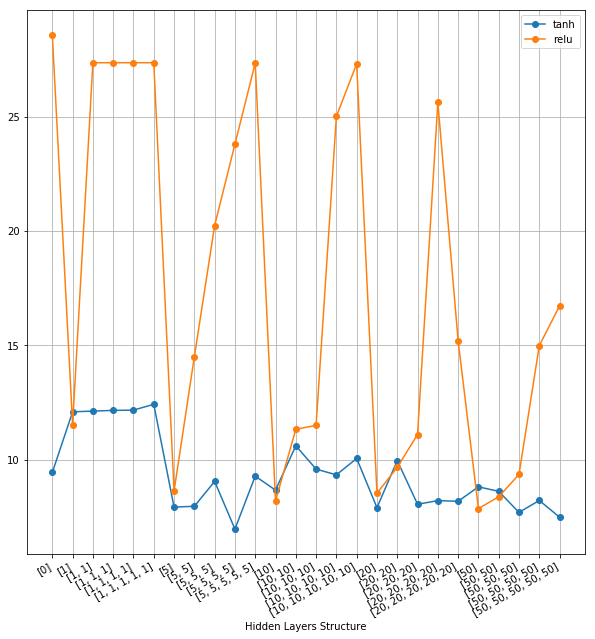

In [18]:
plotter_array_tanh = np.array(tanh_results_data['RMSE Test'])
plotter_array_relu = np.array(relu_results_data['RMSE Test'])
plt.figure(figsize=(10, 10))
plt.plot(plotter_array_tanh, 'o-')
plt.plot(plotter_array_relu, 'o-')
plt.legend(('tanh', 'relu'))
plt.xticks(range(plotter_array_tanh.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layers Structure')
plt.grid(True)

## Analysis of results

Looking at the results, it looks like the gap between the tanh and relu activation functions is very wide. When using relu, the RMSE test tends to be either higher using certain Hidden Layers with what is the best Number of Epochs and will jump down to much lower values when tending to use fewer Hidden Layers.

On the other hand, tanh as an activation function is overall much lower for this Number of Epochs when it comes to the RMSE Test being lower. 

The lowest RMSE Test for tanh is when Hidden Layers are at [5, 5, 5].

The lowest RMSE Test for relu is when Hidden Layers are at [20].

Overall it looks like we get lower RMSE Test values using the tanh activation function. Even the lowest value for the relu activation function still never got as low as tanh did, and with the results for tanh being so dynamic it makes it a fairly unreliable method to use for the purposes of this assignment, though with different epochs we may get a different result.

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A3grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A3grader.tar) and extract `A3grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  80 / 80 if your functions and class are defined correctly. The remaining 20 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A3.ipynb` with `Lastname` being your last name, and then save this notebook. Define both neural network classes, `NeuralNetwork` and `NeuralNetwork_relu` in the file named `neuralnetworks.py`.

Combine your notebook and `neuralnetwork.py` into one zip file or tar file.  Name your tar file `Lastname-A3.tar` or your zip file `Lastname-A3.zip`.  Check in your tar or zip file using the `Assignment 3` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [19]:
%run -i A3grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Kielman-A3.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing:
import neuralnetworks as nn
nnet = nn.NeuralNetwork(4, [10], 1)
acts = nnet.activation(np.array([-0.5, 1.5]))

--- 10/10 points. nnet.activation() is correct.

Testing:
dacts = nnet.activation_derivative([-0.46211716  0.90514825])

--- 10/10 points. nnet.activation_derivative() is correct.

Testing:
import neuralnetworks as nn
nnet_relu = nn.NeuralNetwork_relu(4, [10], 1)
acts = nnet_reul.activation(np.array([-0.5, 1.5]))

--- 10/10 points. nnet.activation() is correct.

Testing:
dacts = nnet_relu.activation_derivative([ 0.   1.5])

--- 10/10 points. nnet.activation_derivative() is correct.

Testing:
import subprocess
subprocess.call(['curl -O www.cs.colostate.edu/~anderson/cs445/notebooks/machine.data'], shell=True)

data = np.loadtxt('mac

## Extra Credit

Create yet another version of the neural network class, called ```NeuralNetwork_logistic```, that uses the `logistic` activation function and its derivative, and repeat the above comparisons.